In [1]:
# Add the library to the path
# If jupyter cannot find SNS-Toolbox
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

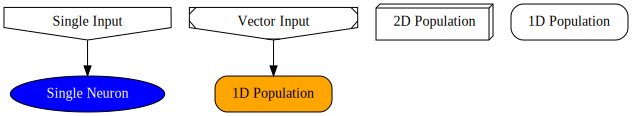

In [2]:
from sns_toolbox.neurons import SpikingNeuron
from sns_toolbox.connections import NonSpikingSynapse, NonSpikingPatternConnection
from sns_toolbox.networks import Network
from sns_toolbox.renderer import render

import numpy as np

neuron_type = SpikingNeuron()

synapse_excitatory = NonSpikingSynapse()
synapse_inhibitory = NonSpikingSynapse(relative_reversal_potential=-40.0)
synapse_modulatory = NonSpikingSynapse(relative_reversal_potential=0.0)

kernel_1d = np.array([-1,1,-1])
synapse_pattern = NonSpikingPatternConnection(kernel_1d+2,kernel_1d)

net = Network(name='Render')
net.add_neuron(neuron_type,name='Single Neuron',color='blue')
net.add_population(neuron_type,shape=[5],name='1D Population',color='orange')
net.add_population(neuron_type,shape=[2,2],name='2D Population')
net.add_population(neuron_type,shape=[5],name='1D Population')

net.add_input('Single Neuron',name='Single Input')
net.add_input(1,size=5,name='Vector Input')

net.add_output(0,name='Voltage Output')
net.add_output(0,name='Spike Output', spiking=True)
net.add_output(2,name='Vector Voltage Output')
net.add_output(3,name='Vector Spike Output',spiking=True)

net.add_connection(synapse_excitatory,0,1)
net.add_connection(synapse_inhibitory,0,2)
net.add_connection(synapse_modulatory,2,0)
net.add_connection(synapse_pattern,1,3)


render(net, view=True, save=False, filename='Test')